# CASO REAL DE NEGOCIO:

## 1 -  Descripción del caso de negocio

La empresa para la que trabajas te ha facilitado un dataset con datos de clientes. Te piden que hagas un análisis de los datos para poder responder a las siguientes preguntas relacionadas con el valor de vida del cliente: ***(CLV - Customer Lifetime Value)***
- ¿Cuál es el valor de vida del cliente?
- ¿Cuál es el valor de vida del cliente por canal de adquisición?
- ¿Cuál es el valor de vida del cliente por producto?
- ¿Cuál es el valor de vida del cliente por mes de adquisición?
- ¿Cuál es el valor de vida del cliente por mes de adquisición y canal de adquisición?

Por otro lado quieren poder visualizar los datos de forma que se puedan ver las siguientes relaciones:
- Valor de vida del cliente vs edad
- Valor de vida del cliente vs edad y sexo
- Valor de vida del cliente vs edad y producto
- Valor de vida del cliente vs edad y canal de adquisición
- Valor de vida del cliente vs edad, sexo y producto
- Valor de vida del cliente vs edad, sexo y canal de adquisición

Además de ello, quieren que analices las campañas de marketing que han realizado contestando a las siguientes preguntas:
- ¿Que tipo de clientes son los que más responden a las campañas de marketing? *cuando hablamos de tipo de cliente, vamos a intentar profundizar, es decir, no quedarnos en hombres y mujeres, o los que tienen un tipo de coche u otro* Intenta segmentar todo lo posible hasta que el resultado sea razonable y se pueda explicar.(Ej, clientes con polizas con menos de un año de vida, que son hombres con cohes deportivos...) Tampoco nos volvamos locos encadenando 8 segmentaciones...
- ¿Que campaña de marketing ha sido más efectiva?
- ¿Que campaña de marketing ha sido más efectiva por canal de adquisición?
- ¿Que campaña de marketing ha sido más efectiva por producto?
- ¿Que campaña de marketing ha sido más efectiva por mes de adquisición?

Una vez hayas realizado el añalisis, tendrás que presentar tus respuestas a las preguntas que te han realizado apoyándote en los gráficos que hayas realizado para ello, además de cualquier otro insight que hayas encontrado en el análisis y consideres relevante para el negocio.

## 2 - Descripcion de los datos:  

+ **customer :** `ID del cliente`                        
+ **state :** `estados en US`                      
+ **customer_lifetime_value :** `CLV es el valor economico del cliente para la empresa durante toda su relacion`
+ **response :**  `Respuesta a campañas/llamadas (marketing-engagement)`                   
+ **coverage :** `Tipo de cobertura del cliente`                        
+ **education** `Nivel educativo del cliente`                   
+ **effective_to_date :** `Fecha efectiva`              
+ **employmentstatus :** `Estado laboral del cliente`                
+ **gender :**  `Genero del cliente`                  
+ **income :**  `Ingresos del cliente`
+ **location_code :** `Zona de residencia del cliente`                  
+ **marital_status :** `Estado Civil del cliente`                  
+ **monthly_premium_auto :** `Premium mensual`            
+ **months_since_last_claim :** `Ultima reclamacion del cliente`          
+ **months_since_policy_inception :** `Inicio de la poliza`    
+ **number_of_open_complaints :** `Reclamaciones abiertas`        
+ **number_of_policies :** `Numero de polizas`              
+ **policy_type :** `Tipo de poliza`                     
+ **policy :** `Poliza`                         
+ **renew_offer_type :**  `Oferta de renovacion`                 
+ **sales_channel :**  `Canal de ventas (primer contacto compañia-cliente)`                 
+ **total_claim_amount :** `Monto de la reclamacion`              
+ **vehicle_class :**  `Tipo de vehiculo`                 
+ **vehicle_size :**  `Tamaño del vehiculo`  

## 3 - Tu Análisis

In [1]:
data

NameError: name 'data' is not defined

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None) # para que salgan todas las columnas en el display del df

data=pd.read_csv('Marketing-Customer-Analysis.csv')

data.columns=[e.lower().replace(' ', '_') for e in data.columns] # para que todas las columnas esten en minusculas y con guion bajo

data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# Tu trabajo aquí

#entender la columna clv:

data.customer_lifetime_value.describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [4]:
#el total del customer_lifetime_value

round(data.customer_lifetime_value.sum(),2)

73117126.3

In [5]:
#2 ¿Cuál es el valor de vida del cliente por canal de adquisición?

pd.options.display.float_format = '{:.2f}'.format
data.groupby('sales_channel')['customer_lifetime_value'].sum()

sales_channel
Agent         27668955.42
Branch        20843300.35
Call Center   14296651.35
Web           10308219.18
Name: customer_lifetime_value, dtype: float64

In [6]:
#3 ¿Cuál es el valor de vida del cliente por producto?

pd.options.display.float_format = '{:.2f}'.format

data.groupby('coverage')['customer_lifetime_value'].sum().sort_values(ascending=False)

coverage
Basic      40037853.36
Extended   24101296.00
Premium     8977976.94
Name: customer_lifetime_value, dtype: float64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [8]:
#4 ¿Cuál es el valor de vida del cliente por mes de adquisición?

data['month'] = data['effective_to_date'].apply(lambda x: x.split('/')[0])

data.groupby('month')['customer_lifetime_value'].sum().sort_values(ascending=False)



month
1   39398963.43
2   33718162.87
Name: customer_lifetime_value, dtype: float64

In [9]:
#verificar los datos del año, por si tiene sentido

data['year'] = data['effective_to_date'].apply(lambda x: x.split('/')[-1])

data.groupby('year')['customer_lifetime_value'].sum().sort_values(ascending=False)

year
11   73117126.30
Name: customer_lifetime_value, dtype: float64

In [10]:
#5 ¿Cuál es el valor de vida del cliente por mes de adquisición y canal de adquisición?

pd.options.display.float_format = '{:.2f}'.format
data.groupby(['month','sales_channel'])['customer_lifetime_value'].sum()

month  sales_channel
1      Agent           14501566.90
       Branch          11291480.74
       Call Center      7808939.54
       Web              5796976.25
2      Agent           13167388.52
       Branch           9551819.61
       Call Center      6487711.82
       Web              4511242.93
Name: customer_lifetime_value, dtype: float64

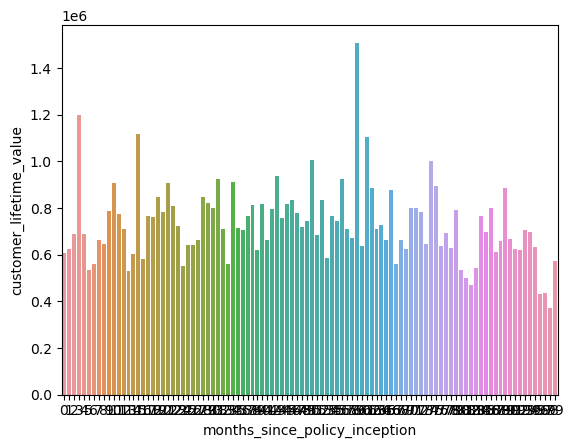

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=data.groupby(['months_since_policy_inception'])['customer_lifetime_value'].sum().reset_index(), x="months_since_policy_inception", y="customer_lifetime_value")
plt.show()


In [12]:
#como tenemos una distrbución "rara" con el elemento months_since_policy_inception, he considerado cambiarlo por el numero de años
#redondeado al año abajo ya que completas tu cumple cuando se pasan 12 meses solamente

import math

data['edad'] = data['months_since_policy_inception'].apply(lambda x: math.floor(x/12))

data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,year,edad
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize,2,11,0
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize,1,11,3
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize,2,11,3
3,WW63253,California,7645.86,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize,1,11,5
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize,2,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.99,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.23,Four-Door Car,Medsize,2,11,7
9130,PK87824,California,3096.51,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.20,Four-Door Car,Medsize,2,11,2
9131,TD14365,California,8163.89,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.78,Four-Door Car,Medsize,2,11,3
9132,UP19263,California,7524.44,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.20,Four-Door Car,Large,2,11,0


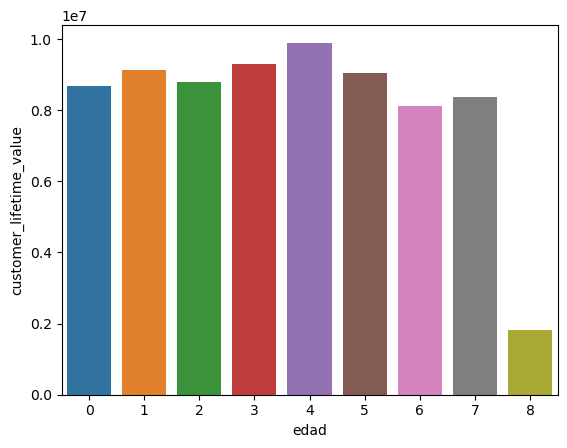

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un bar plot del valor de vida del cliente vs la edad utilizando Seaborn

sns.barplot(data=data.groupby(['edad'])['customer_lifetime_value'].sum().reset_index(), x="edad", y="customer_lifetime_value")
plt.show()

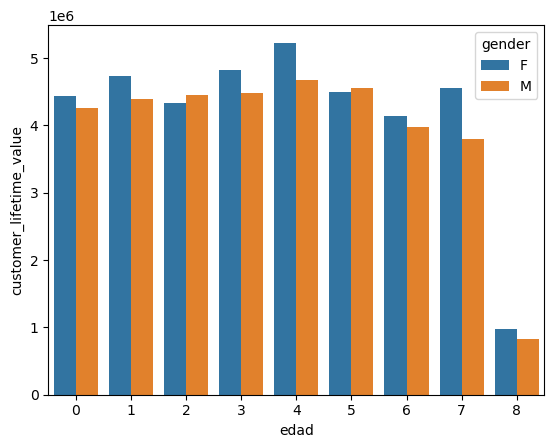

In [14]:
# Crear un bar plot del valor de vida del cliente vs la edad y género utilizando Seaborn

sns.barplot(data=data.groupby(['edad', 'gender'])['customer_lifetime_value'].sum().reset_index(), x="edad", y="customer_lifetime_value", hue="gender")
plt.show()


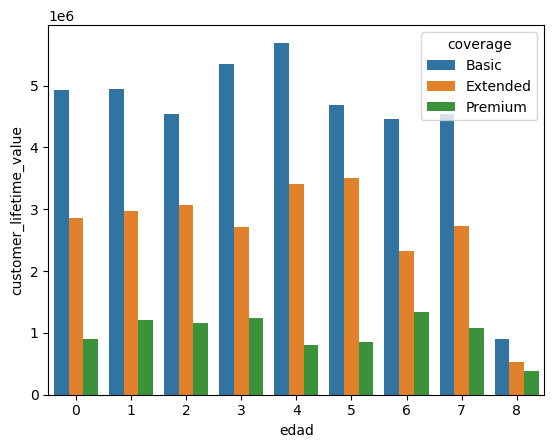

In [15]:
# Crear un bar plot del valor de vida del cliente vs la edad y producto utilizando Seaborn

sns.barplot(data=data.groupby(['edad', 'coverage'])['customer_lifetime_value'].sum().reset_index(), x="edad", y="customer_lifetime_value", hue="coverage")
plt.show()


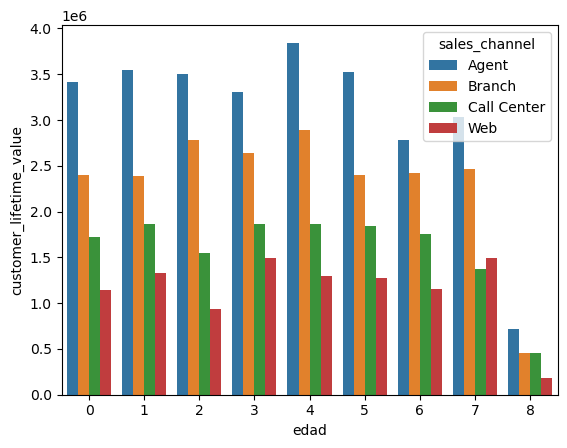

In [16]:
# Crear un bar plot del valor de vida del cliente vs la edad y canal de adquisicion utilizando Seaborn

sns.barplot(data=data.groupby(['edad', 'sales_channel'])['customer_lifetime_value'].sum().reset_index(), x="edad", y="customer_lifetime_value", hue="sales_channel")
plt.show()

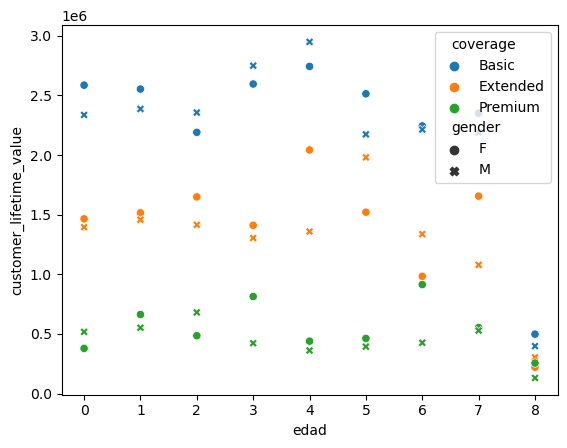

In [17]:
# Crear un plot del valor de vida del cliente vs la edad, sexo y producto utilizando Seaborn

sns.scatterplot(data=data.groupby(['edad','coverage','gender'])['customer_lifetime_value'].sum().reset_index(), x="edad",y="customer_lifetime_value", hue="coverage", style="gender" )
plt.show()

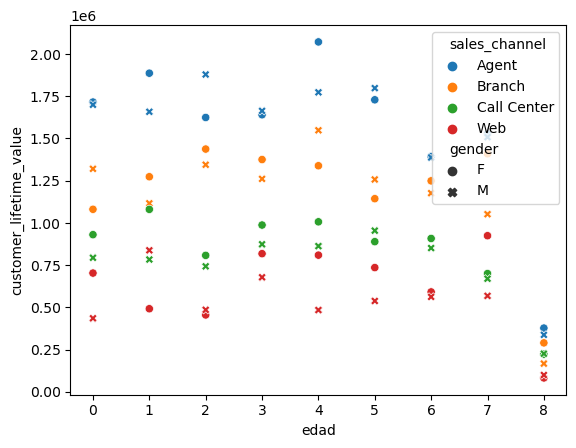

In [18]:
# Crear un plot del valor de vida del cliente vs la edad, sexo y canal de adquisicion utilizando Seaborn

sns.scatterplot(data=data.groupby(['edad','sales_channel','gender'])['customer_lifetime_value'].sum().reset_index(), x="edad",y="customer_lifetime_value", hue="sales_channel", style="gender" )
plt.show()

In [19]:
#¿Que tipo de clientes son los que más responden a las campañas de marketing? cuando hablamos de tipo de cliente, vamos a intentar profundizar, es decir, no quedarnos en hombres y mujeres, o los que tienen un tipo de coche u otro Intenta segmentar todo lo posible hasta que el resultado sea razonable y se pueda explicar.(Ej, clientes con polizas con menos de un año de vida, que son hombres con cohes deportivos...) Tampoco nos volvamos locos encadenando 8 segmentaciones...
#¿Que campaña de marketing ha sido más efectiva?
#¿Que campaña de marketing ha sido más efectiva por canal de adquisición?
#¿Que campaña de marketing ha sido más efectiva por producto?
#¿Que campaña de marketing ha sido más efectiva por mes de adquisición?

In [20]:
#¿Que tipo de clientes son los que más responden a las campañas de marketing? cuando hablamos de tipo de cliente, 
#vamos a intentar profundizar, es decir, no quedarnos en hombres y mujeres, o los que tienen un tipo de coche 
#u otro Intenta segmentar todo lo posible hasta que el resultado sea razonable y se pueda explicar.
#(Ej, clientes con polizas con menos de un año de vida, que son hombres con cohes deportivos...) 
#Tampoco nos volvamos locos encadenando 8 segmentaciones...


In [21]:
#para contestar a la pregunta empezamos con mirar la cantidad de respuestas positivas y negativas a campañas de mkt
data.response.value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

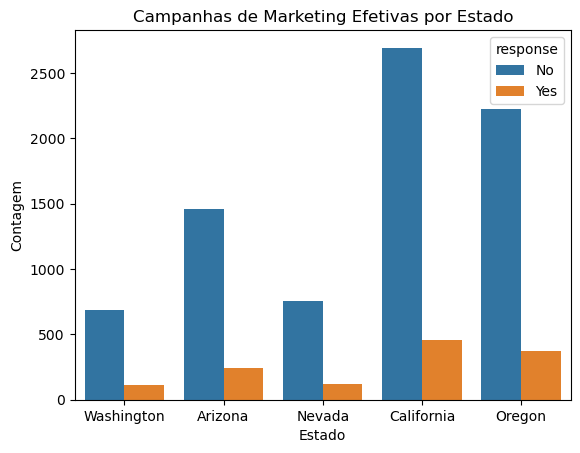

In [22]:
sns.countplot(data=data, x='state', hue='response')
plt.title('Campanhas de Marketing Efetivas por Estado')
plt.xlabel('Estado')
plt.ylabel('Contagem')
plt.show()

In [23]:
#en todos los estados observamos el mismo padrón de campañas de marketing. 

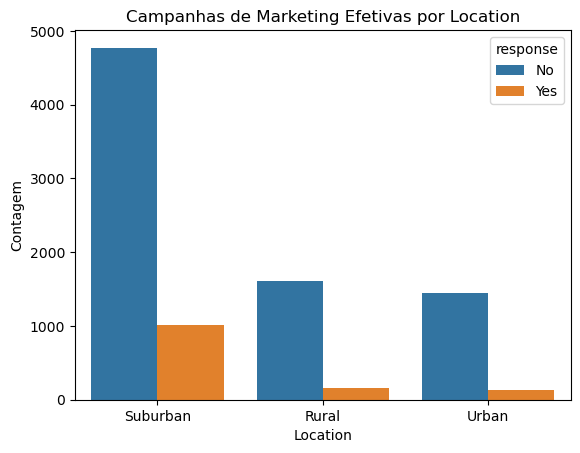

In [24]:
sns.countplot(data=data, x='location_code', hue='response')
plt.title('Campanhas de Marketing Efetivas por Location')
plt.xlabel('Location')
plt.ylabel('Contagem')
plt.show()

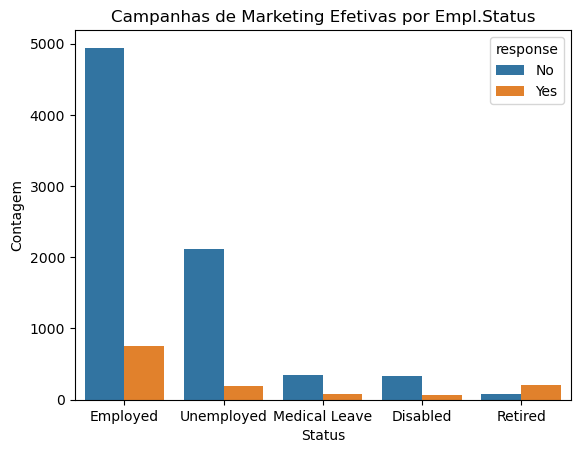

In [25]:
sns.countplot(data=data, x='employmentstatus', hue='response')
plt.title('Campanhas de Marketing Efetivas por Empl.Status')
plt.xlabel('Status')
plt.ylabel('Contagem')
plt.show()

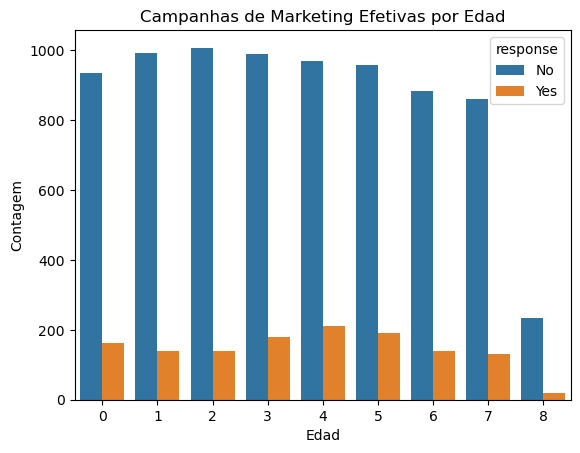

In [26]:
sns.countplot(data=data, x='edad', hue='response')
plt.title('Campanhas de Marketing Efetivas por Edad')
plt.xlabel('Edad')
plt.ylabel('Contagem')
plt.show()

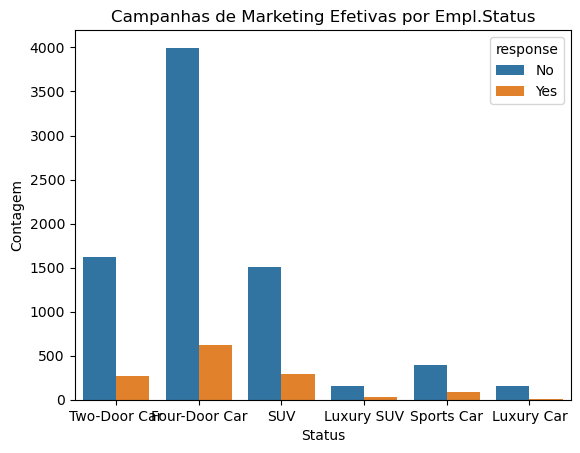

In [27]:
sns.countplot(data=data, x='vehicle_class', hue='response')
plt.title('Campanhas de Marketing Efetivas por Empl.Status')
plt.xlabel('Status')
plt.ylabel('Contagem')
plt.show()

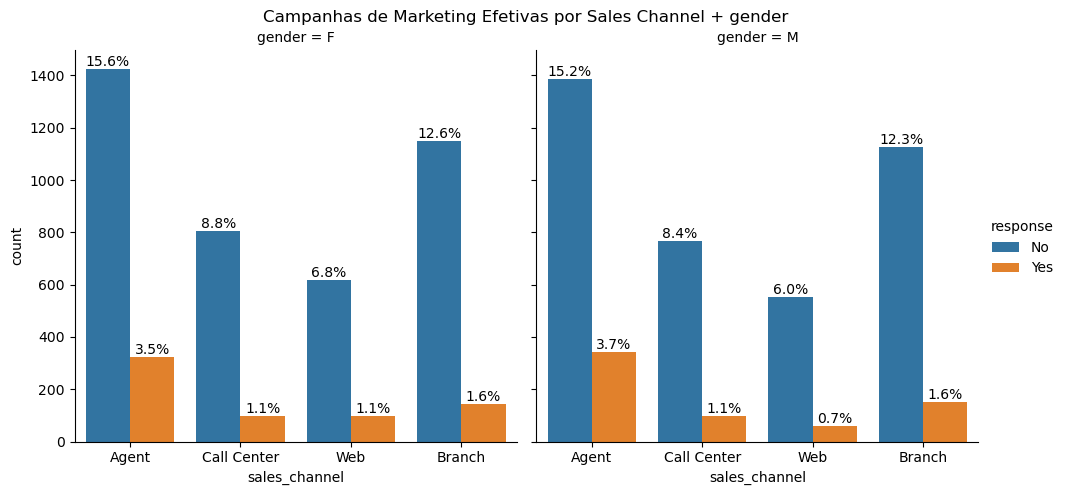

In [28]:
fg = sns.catplot(data=data, kind='count', x='sales_channel', hue='response', col = 'gender')
fg.fig.subplots_adjust(top=0.9)
fg.fig.suptitle('Campanhas de Marketing Efetivas por Sales Channel + gender')

for ax in fg.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{h/data.response.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

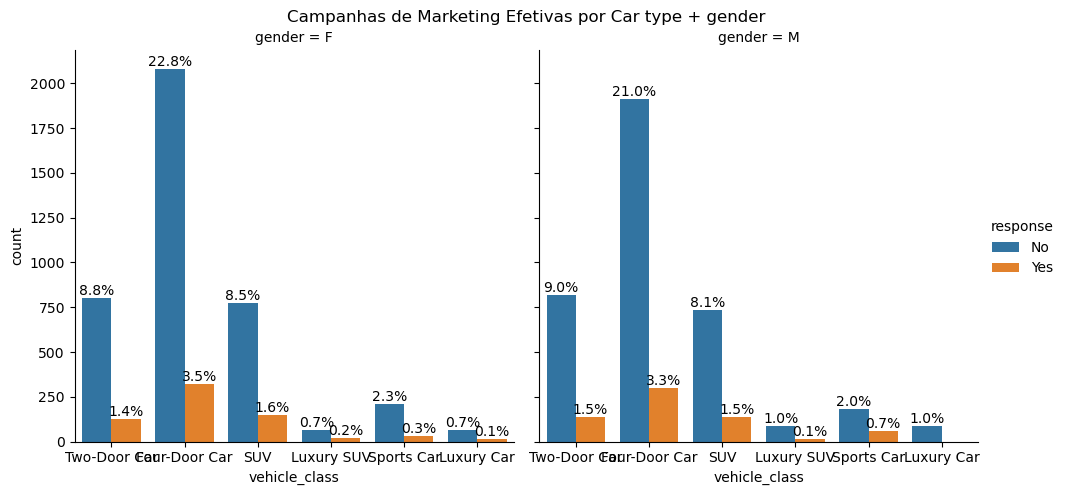

In [29]:
fg = sns.catplot(data=data, kind='count', x='vehicle_class', hue='response', col = 'gender')
fg.fig.subplots_adjust(top=0.9)
fg.fig.suptitle('Campanhas de Marketing Efetivas por Car type + gender')

for ax in fg.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{h/data.response.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

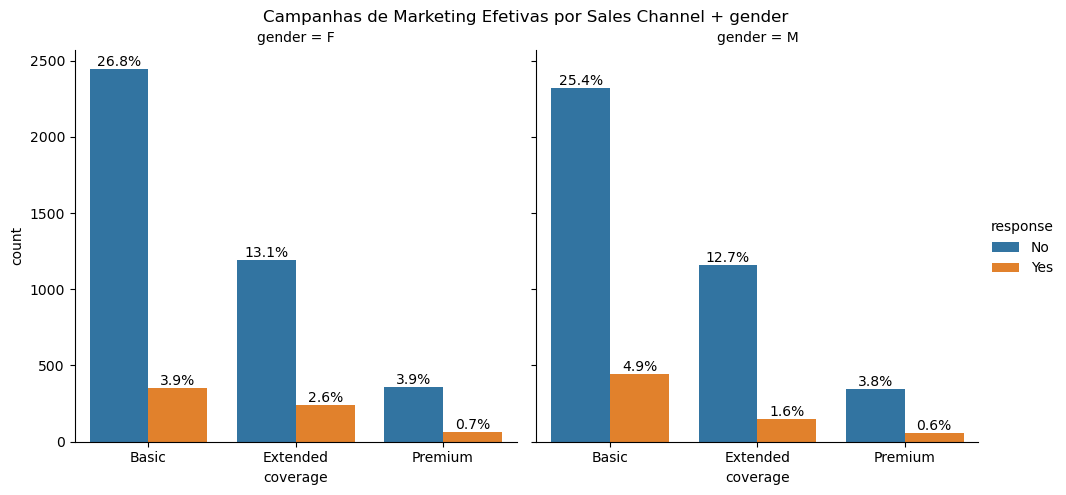

In [30]:
fg = sns.catplot(data=data, kind='count', x='coverage', hue='response', col = 'gender')
fg.fig.subplots_adjust(top=0.9)
fg.fig.suptitle('Campanhas de Marketing Efetivas por Sales Channel + gender')

for ax in fg.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{h/data.response.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

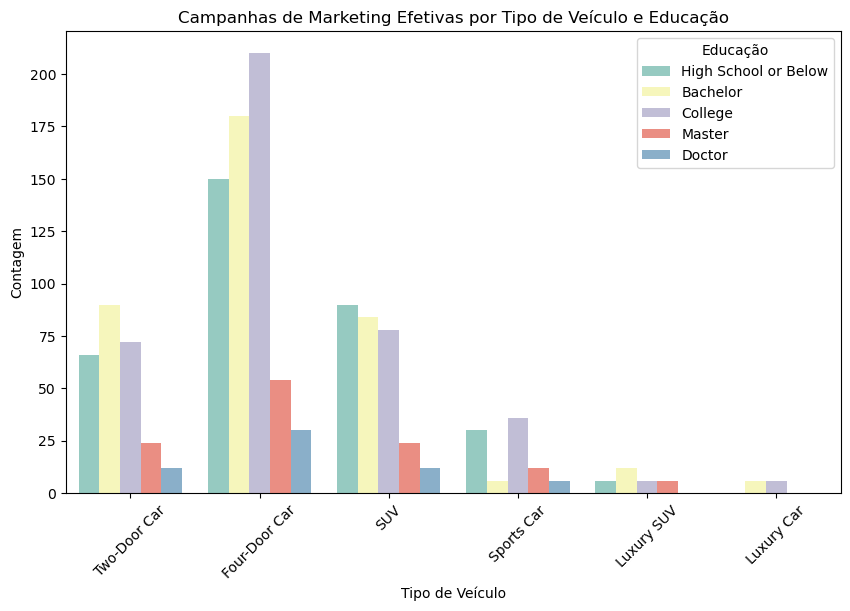

In [31]:
# Filtrar apenas os registros de campanhas efetivas (response == 'Yes')
df_efetivas = data[data['response'] == 'Yes']

# Segmentação por tipo de veículo e educação para campanhas efetivas
plt.figure(figsize=(10, 6))
sns.countplot(data=df_efetivas, x='vehicle_class', hue='education', hue_order=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'], palette='Set3')
plt.title('Campanhas de Marketing Efetivas por Tipo de Veículo e Educação')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Educação')
plt.show()

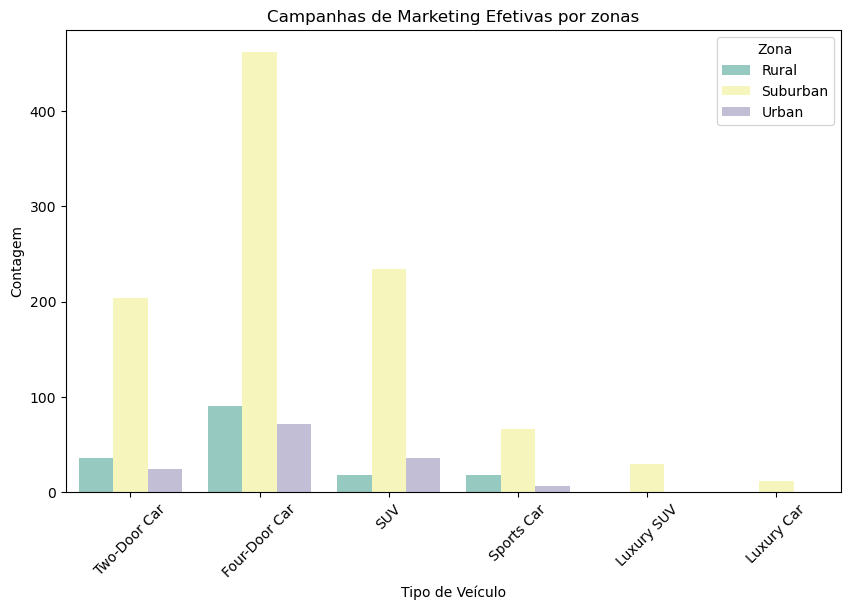

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_efetivas, x='vehicle_class', hue='location_code', palette='Set3')
plt.title('Campanhas de Marketing Efetivas por zonas')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Zona')
plt.show()

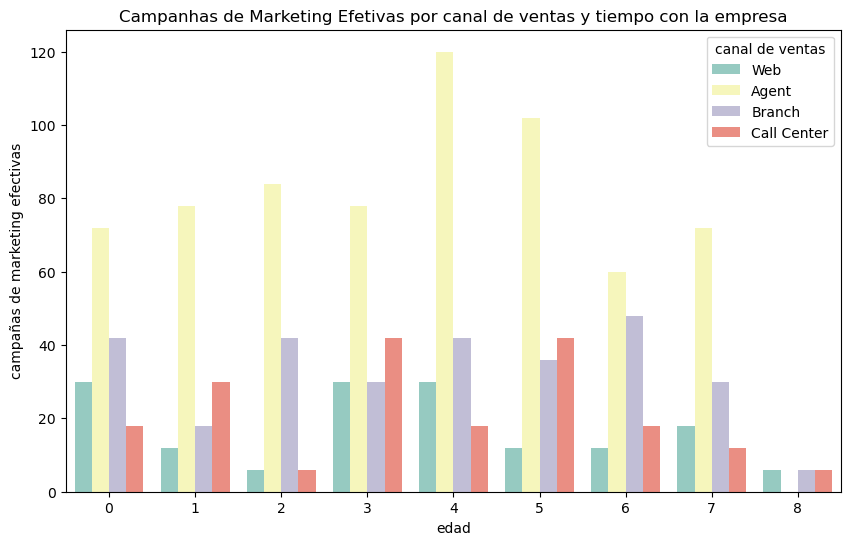

In [33]:
#¿Que campaña de marketing ha sido más efectiva por canal de adquisición?

plt.figure(figsize=(10, 6))
sns.countplot(data=df_efetivas, x='edad', hue='sales_channel', palette='Set3')
plt.title('Campanhas de Marketing Efetivas por canal de ventas y tiempo con la empresa')
plt.xlabel('edad')
plt.ylabel('campañas de marketing efectivas')
plt.xticks(rotation=0)
plt.legend(title='canal de ventas')
plt.show()

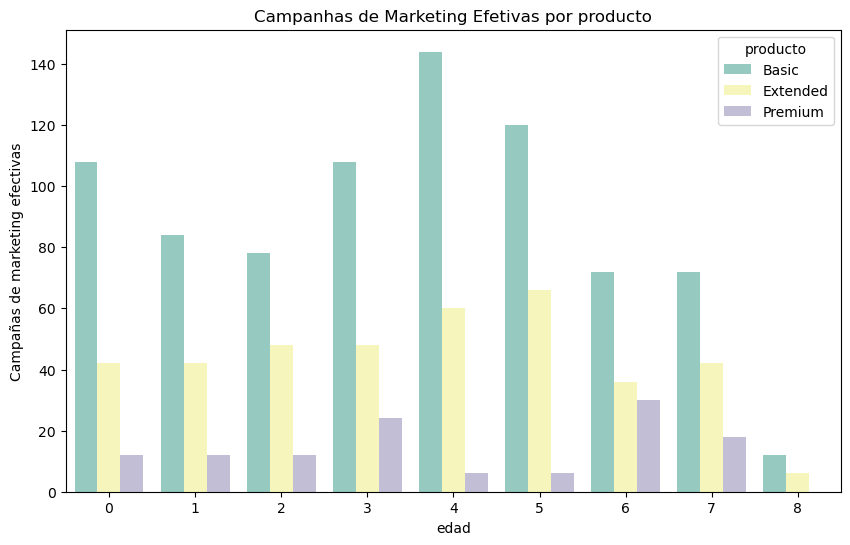

In [34]:
#¿Que campaña de marketing ha sido más efectiva por producto?

plt.figure(figsize=(10, 6))
sns.countplot(data=df_efetivas, x='edad', hue='coverage', palette='Set3')
plt.title('Campanhas de Marketing Efetivas por producto')
plt.xlabel('edad')
plt.ylabel('Campañas de marketing efectivas')
plt.xticks(rotation=0)
plt.legend(title='producto')
plt.show()

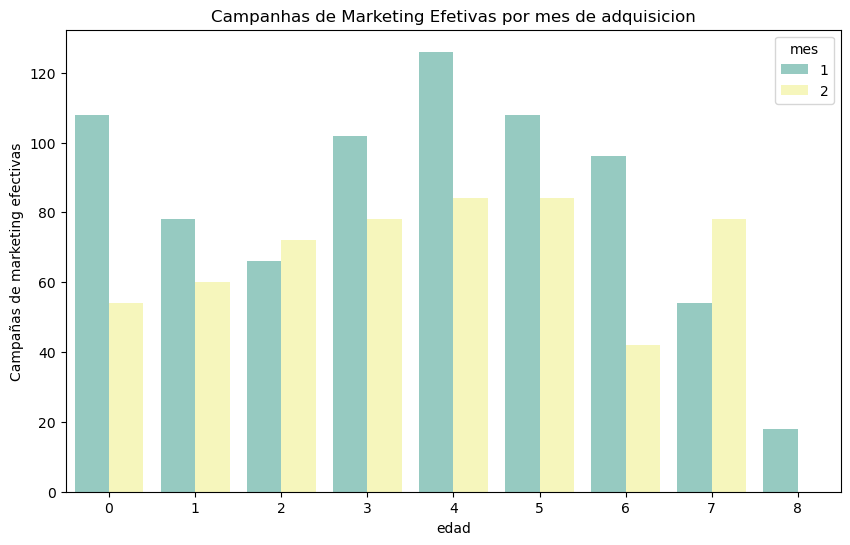

In [35]:
#¿Que campaña de marketing ha sido más efectiva por mes de adquisición

plt.figure(figsize=(10, 6))
sns.countplot(data=df_efetivas, x='edad', hue='month', palette='Set3')
plt.title('Campanhas de Marketing Efetivas por mes de adquisicion')
plt.xlabel('edad')
plt.ylabel('Campañas de marketing efectivas')
plt.xticks(rotation=0)
plt.legend(title='mes')
plt.show()

In [36]:
#Sugerencias: aplicar campañas de mkt a retired people
#dar incentivos a ventas de basic/extended (premium tiene poco retorno)
